# Example of the `aitlas` toolbox in the context of image segmentation

This notebook shows a sample implementation of a image segmentation using the `aitlas` toolbox.

## Import the required packages

In [15]:
from aitlas.datasets import LandCoverAiDataset
from aitlas.models import DeepLabV3
from aitlas.utils import image_loader
from aitlas.transforms import MinMaxNormTransponse

## Visualize images and masks

Total number of patches: 7470


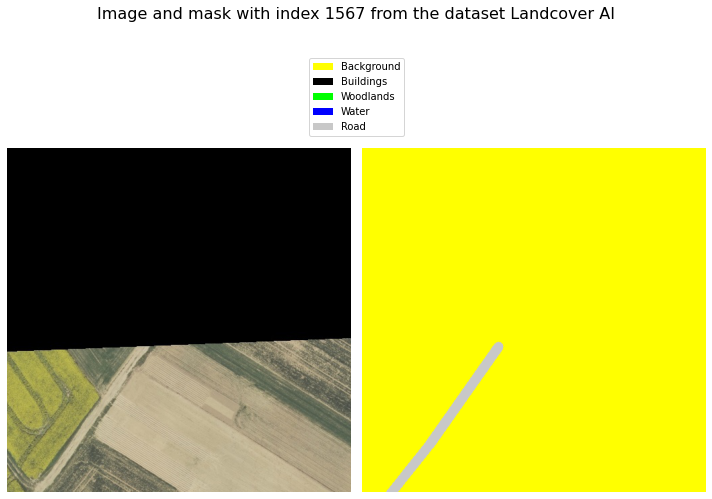

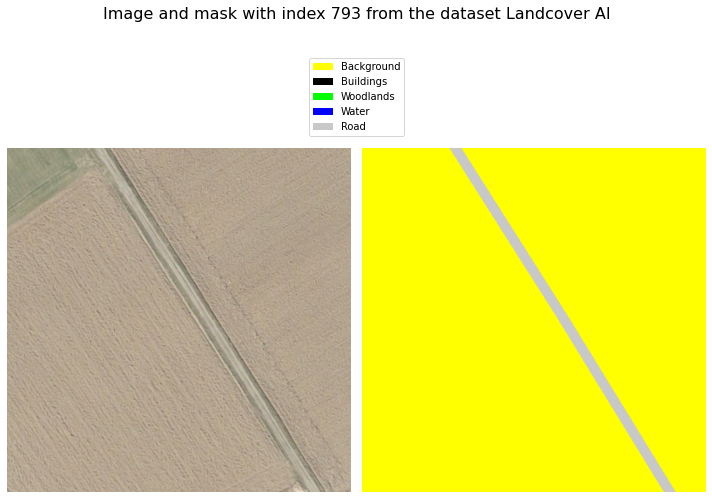

In [2]:
dataset_config = {
    "data_dir": "/media/ssd/landcover_ai/output",
    "csv_file": "/media/ssd/landcover_ai/train.txt"
}
dataset = LandCoverAiDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(1567);
dataset.show_image(793);

## Load train data

In [3]:
train_dataset_config = {
    "batch_size": 4,
    "shuffle": True,
    "num_workers": 4,
    "data_dir": "/media/ssd/landcover_ai/output",
    "csv_file": "/media/ssd/landcover_ai/train.txt",
    "transforms": ["aitlas.transforms.MinMaxNormTransponse"],
    "target_transforms": ["aitlas.transforms.Transponse"]
}
train_dataset = LandCoverAiDataset(train_dataset_config)
len(train_dataset)

7470

## Create the model

In [4]:
epochs = 5
model_directory = "/media/ssd/landcover_ai/experiments/"
model_config = {
    "num_classes": 5, 
    "learning_rate": 0.0001,
    "pretrained": True, 
    "threshold": 0.5,
    "metrics": ["iou"]
}

model = DeepLabV3(model_config)
model.prepare()

## Start the training

In [5]:
model.train_model(
    train_dataset=train_dataset,
    epochs=epochs,
    model_directory=model_directory,
    run_id='1'
)

2021-12-03 19:57:13,511 INFO Starting training.
training: 100%|███████████████████████████| 1868/1868 [2:06:51<00:00,  4.07s/it]
2021-12-03 22:04:05,518 INFO epoch: 1, time: 7611, loss:  0.04536
testing on train set: 100%|█████████████████| 1868/1868 [10:20<00:00,  3.01it/s]
2021-12-03 22:14:27,039 INFO IOU Mean:0.7300677830635822, IOU per Class:0.7218264012688563, 0.8890278324655592, 0.6617673067815848, 0.7566403065798709, 0.6210770682220399
training: 100%|███████████████████████████| 1868/1868 [2:06:52<00:00,  4.08s/it]
2021-12-04 00:21:19,823 INFO epoch: 2, time: 7612, loss:  0.02858
testing on train set: 100%|█████████████████| 1868/1868 [10:20<00:00,  3.01it/s]
2021-12-04 00:31:39,968 INFO IOU Mean:0.7801340555587162, IOU per Class:0.7811961096708652, 0.9022172439821599, 0.7125968802656686, 0.7939624163974475, 0.710697627477439
training: 100%|███████████████████████████| 1868/1868 [2:06:53<00:00,  4.08s/it]
2021-12-04 02:38:33,241 INFO epoch: 3, time: 7614, loss:  0.02459
testing 

## Evalute the model using test data

In [9]:
test_dataset_config = {
    "batch_size": 4,
    "shuffle": False,
    "num_workers": 4,
    "data_dir": "/media/ssd/landcover_ai/output",
    "csv_file": "/media/ssd/landcover_ai/test.txt",
    "transforms": ["aitlas.transforms.MinMaxNormTransponse"],
    "target_transforms": ["aitlas.transforms.Transponse"]
}

test_dataset = LandCoverAiDataset(test_dataset_config)
len(test_dataset)

model = DeepLabV3(model_config)
model.prepare()
model_path = "/media/ssd/landcover_ai/experiments/checkpoint.pth.tar"
model.evaluate(dataset=test_dataset, model_path=model_path)
model.running_metrics.get_scores(["iou"])

2021-12-04 09:18:19,873 INFO Loading checkpoint /media/ssd/landcover_ai/experiments/checkpoint.pth.tar
2021-12-04 09:18:20,298 INFO Loaded checkpoint /media/ssd/landcover_ai/experiments/checkpoint.pth.tar at epoch 6
testing on test set: 100%|████████████████████| 401/401 [02:08<00:00,  3.11it/s]


[{'IOU Mean': 0.8174355344218995,
  'IOU per Class': [0.7844975778532037,
   0.921015853864535,
   0.7644805252283449,
   0.8979515721998207,
   0.7192321429635936]}]

## Predictions

2021-12-04 09:31:34,284 INFO Loading checkpoint /media/ssd/landcover_ai/experiments/checkpoint.pth.tar
2021-12-04 09:31:34,606 INFO Loaded checkpoint /media/ssd/landcover_ai/experiments/checkpoint.pth.tar at epoch 6


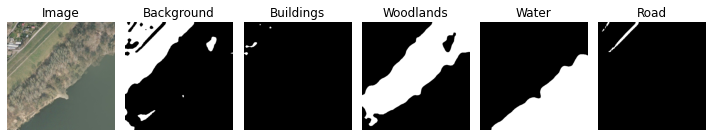

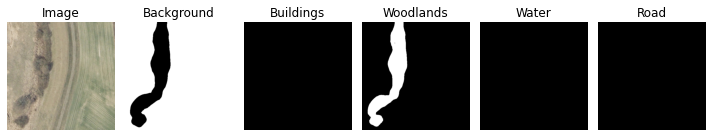

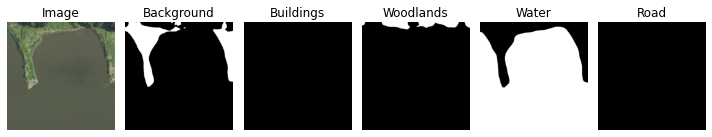

In [21]:
model_path = "/media/ssd/landcover_ai/experiments/checkpoint.pth.tar"
#labels = LandCoverAiDataset.labels
labels = ["Background", "Buildings", "Woodlands", "Water", "Road"]
transform = MinMaxNormTransponse()
model.load_model(model_path)

image = image_loader('/media/ssd/landcover_ai/output/N-34-97-C-b-1-2_61.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/media/ssd/landcover_ai/output/M-33-48-A-c-4-4_49.jpg')
fig = model.predict_masks(image, labels, transform)

image = image_loader('/media/ssd/landcover_ai/output/N-33-139-C-d-2-2_159.jpg')
fig = model.predict_masks(image, labels, transform)